In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# generate random numbers uniformly distributed between 0 and 1
uniform = np.random.uniform(0,9.7,100)


gaussian_1 = np.random.normal(loc=1.25, scale=0.11, size=4)
gaussian_2 = np.random.normal(loc=1.30, scale=0.50, size=4)
print(gaussian_1)
print(gaussian_2)

[1.141041   1.18770725 1.26096165 1.19461768]
[0.52466828 1.33428149 0.76884814 1.53679622]


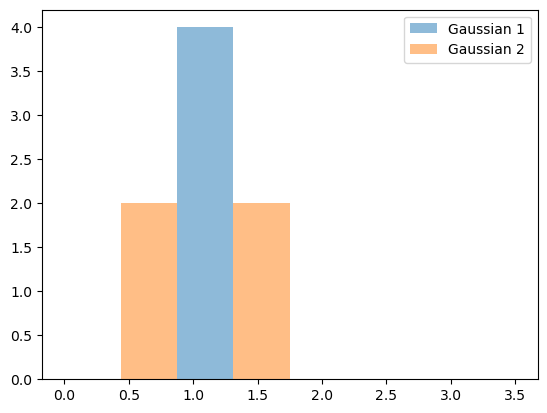

In [28]:
xmin=0
xmax=3.5
nbins=8
fig, ax = plt.subplots()
ax.hist(gaussian_1, bins=nbins, range=(xmin, xmax), alpha=0.5, label='Gaussian 1')
ax.hist(gaussian_2, bins=nbins, range=(xmin, xmax), alpha=0.5, label='Gaussian 2')
ax.legend()
plt.show()

In [29]:
#calculate likelihood:
given_data = np.array([1.01, 1.30, 1.35, 1.44])

def gauss(x, mu, sigma):
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

likelihood_1 = np.prod(gauss(gaussian_1, 1.25, np.sqrt(0.11)))
print(f"Likelihood of Gaussian 1: {likelihood_1}")
likelihood_2 = np.prod(gauss(gaussian_2, 1.30, np.sqrt(0.50)))
print(f"Likelihood of Gaussian 2: {likelihood_2}")

likelihood_given_data_1 = np.prod(gauss(given_data, 1.25, np.sqrt(0.11)))
print(f"Likelihood of given data under Gaussian 1: {likelihood_given_data_1}")
likelihood_given_data_2 = np.prod(gauss(given_data, 1.30, np.sqrt(0.50)))
print(f"Likelihood of given data under Gaussian 2: {likelihood_given_data_2}")


Likelihood of Gaussian 1: 1.9207306361730567
Likelihood of Gaussian 2: 0.039558724938492766
Likelihood of given data under Gaussian 1: 1.2918411137616796
Likelihood of given data under Gaussian 2: 0.09111254560865159


In [30]:
np.random.seed(42)

gaussian_vals = np.random.normal(loc=0.2, scale=0.1, size=50)

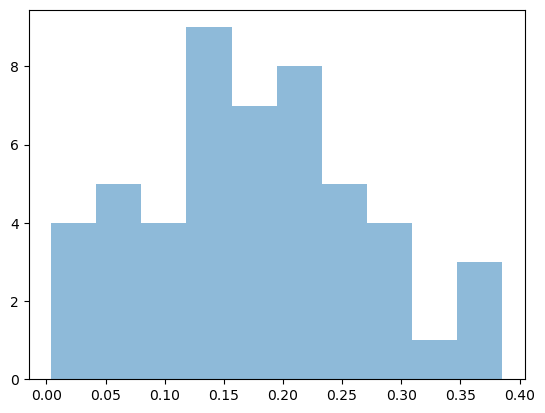

In [31]:
fig, ax = plt.subplots()
ax.hist(gaussian_vals, bins=10, alpha=0.5)
plt.show()

In [43]:
def ln_likelihood(vals, func, mu, sigma):
    return np.sum(np.log(func(vals, mu, sigma)))

def gauss(x, mu, sigma):
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

#scan
mu_list = np.linspace(-0.1, 0.5, 100)
sigma_list = np.linspace(0.05, 0.5, 100)
ln_likelihoods = np.zeros((len(mu_list), len(sigma_list)))

for mu in range(len(mu_list)):
    for sigma in range(len(sigma_list)):
        ln_likelihoods[mu,sigma] = ln_likelihood(gaussian_vals, gauss, mu_list[mu], sigma_list[sigma])



In [46]:
# set negative values to zero
ln_likelihoods[ln_likelihoods < 0] = 0
max_ln_likelihood = np.max(ln_likelihoods)
print(f"Maximum log-likelihood: {max_ln_likelihood}")

max_indices = np.unravel_index(np.argmax(ln_likelihoods), ln_likelihoods.shape)
max_mu = mu_list[max_indices[0]]
max_sigma = sigma_list[max_indices[1]]
print(f"Maximum log-likelihood occurs at mu = {max_mu}, sigma = {max_sigma}")

Maximum log-likelihood: 48.09978852073334
Maximum log-likelihood occurs at mu = 0.1787878787878788, sigma = 0.09090909090909091


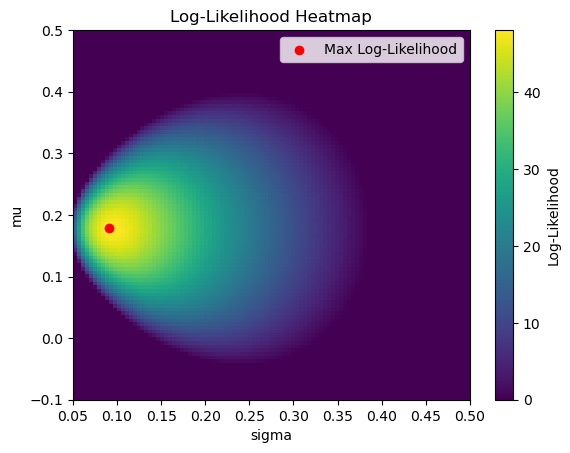

In [50]:



plt.imshow(ln_likelihoods, aspect='auto', origin='lower',
           extent=[sigma_list[0], sigma_list[-1], mu_list[0], mu_list[-1]])
cbar = plt.colorbar()
cbar.set_label('Log-Likelihood')
plt.scatter(max_sigma, max_mu, color='red', label='Max Log-Likelihood', zorder=5)
plt.xlabel('sigma')
plt.ylabel('mu')
plt.title('Log-Likelihood Heatmap')

plt.legend()
plt.show()


In [51]:
Ntries = 10

for i in range(Ntries):
    gaussian_vals = np.random.normal(loc=0.2, scale=0.1, size=50)
    ln_likelihoods = np.zeros((len(mu_list), len(sigma_list)))
    for mu in range(len(mu_list)):
        for sigma in range(len(sigma_list)):
            ln_likelihoods[mu,sigma] = ln_likelihood(gaussian_vals, gauss, mu_list[mu], sigma_list[sigma])
    ln_likelihoods[ln_likelihoods < 0] = 0
    max_ln_likelihood = np.max(ln_likelihoods)

    true_ln_likelihood = ln_likelihood(gaussian_vals, gauss, 0.2, 0.1)
    print(f"True log-likelihood: {true_ln_likelihood}, Max log-likelihood: {max_ln_likelihood}")

True log-likelihood: 50.445541504263794, Max log-likelihood: 51.3970544277593
True log-likelihood: 43.88265376608242, Max log-likelihood: 43.91922354110956
True log-likelihood: 49.43764487817438, Max log-likelihood: 50.274679548995856
True log-likelihood: 39.40042817701127, Max log-likelihood: 40.28546913990967
True log-likelihood: 40.55801785118441, Max log-likelihood: 40.78705854994867
True log-likelihood: 54.48867737154021, Max log-likelihood: 57.50894490644575
True log-likelihood: 44.61428997029107, Max log-likelihood: 45.42394711699474
True log-likelihood: 41.047526486088394, Max log-likelihood: 41.26482620898596
True log-likelihood: 41.14995566949895, Max log-likelihood: 41.38604291720126
True log-likelihood: 47.50931812634194, Max log-likelihood: 49.74054794784171


As seen above the max is higher than the true which is expected as we have a sample and thus not the true distribution